In [1]:
!pip install plotly

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import norm

In [3]:
# Reading the dataset
healthcare_df = pd.read_csv('healthcare_dataset.csv')
healthcare_df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


In [4]:
# Getting size of the data
print(healthcare_df.shape)

(55500, 15)


In [5]:
# Convert 'Date of Admission' and 'Discharge Date' to datetime objects
healthcare_df['Date of Admission'] = pd.to_datetime(healthcare_df['Date of Admission'])
healthcare_df['Discharge Date'] = pd.to_datetime(healthcare_df['Discharge Date'])
display('Date of Admission')
display('Disharge Date')

'Date of Admission'

'Disharge Date'

In [6]:
# Calculate the length of stay
healthcare_df['Length of Stay'] = (healthcare_df['Discharge Date'] - healthcare_df['Date of Admission']).dt.days
print(healthcare_df['Length of Stay'])

0         2
1         6
2        15
3        30
4        20
         ..
55495    30
55496     9
55497    28
55498     6
55499    27
Name: Length of Stay, Length: 55500, dtype: int64


In [7]:
# Resetting index to get mean between length of stay and billing amount
df_grouped = healthcare_df.groupby('Length of Stay')\
['Billing Amount'].mean().reset_index()

In [8]:
# Dropping the null values
healthcare_df_dropped=healthcare_df.dropna(how='any')
healthcare_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                55500 non-null  object        
 1   Age                 55500 non-null  int64         
 2   Gender              55500 non-null  object        
 3   Blood Type          55500 non-null  object        
 4   Medical Condition   55500 non-null  object        
 5   Date of Admission   55500 non-null  datetime64[ns]
 6   Doctor              55500 non-null  object        
 7   Hospital            55500 non-null  object        
 8   Insurance Provider  55500 non-null  object        
 9   Billing Amount      55500 non-null  float64       
 10  Room Number         55500 non-null  int64         
 11  Admission Type      55500 non-null  object        
 12  Discharge Date      55500 non-null  datetime64[ns]
 13  Medication          55500 non-null  object    

In [9]:
# Obtaining a comparsion of billing price difference for only one day of length of stay
one_day_length_of_stay_df = healthcare_df[healthcare_df_dropped['Length of Stay'] == 1]
display(one_day_length_of_stay_df)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Length of Stay
81,ChAd MorEnO,67,Male,AB+,Hypertension,2020-08-26,Connie Boyd,Inc Skinner,Aetna,46814.011195,134,Urgent,2020-08-27,Penicillin,Abnormal,1
122,Jeffrey tuRNER,85,Female,O+,Obesity,2020-05-31,Matthew Carter,"Kim Rosario, and Hammond",Aetna,39957.940622,211,Urgent,2020-06-01,Ibuprofen,Normal,1
136,tiMOthY CoLemaN,54,Female,AB+,Cancer,2020-03-04,Misty Garcia,Russell Ltd,UnitedHealthcare,14299.993447,480,Emergency,2020-03-05,Lipitor,Abnormal,1
387,KelLY sANfoRD,28,Male,B-,Arthritis,2020-07-02,Nancy Vaughn,"Martinez Taylor Lopez, and",UnitedHealthcare,5509.595801,313,Emergency,2020-07-03,Lipitor,Abnormal,1
448,brENda BecK,69,Female,B+,Obesity,2023-02-24,Barbara Burgess,Group Lopez,Blue Cross,2936.894499,223,Emergency,2023-02-25,Aspirin,Abnormal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55373,PatRiCK BrOOKs,27,Male,O-,Asthma,2021-05-28,Cheryl Anderson,King-Garza,Cigna,27618.798469,198,Urgent,2021-05-29,Paracetamol,Abnormal,1
55382,kRiStiN orTIZ,13,Male,A-,Asthma,2020-04-01,Donna Fernandez,"Yu and Mckenzie Lucas,",UnitedHealthcare,50526.712855,493,Urgent,2020-04-02,Paracetamol,Abnormal,1
55440,cHaRleS cOx,79,Male,O+,Obesity,2019-05-30,Larry Rios,Davis-Hardin,UnitedHealthcare,19945.903075,398,Elective,2019-05-31,Penicillin,Inconclusive,1
55441,pATRiCia ray,19,Male,A+,Obesity,2023-12-20,Kelly Jenkins,Baker PLC,Aetna,3586.226804,479,Emergency,2023-12-21,Aspirin,Normal,1


In [10]:
# Rounding 'Billing Amount' to 2 decimal places (without $ sign)
one_day_length_of_stay_df.loc[:, 'Billing Amount'] = one_day_length_of_stay_df['Billing Amount'].round(2)
one_day_length_of_stay_df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Length of Stay
81,ChAd MorEnO,67,Male,AB+,Hypertension,2020-08-26,Connie Boyd,Inc Skinner,Aetna,46814.01,134,Urgent,2020-08-27,Penicillin,Abnormal,1
122,Jeffrey tuRNER,85,Female,O+,Obesity,2020-05-31,Matthew Carter,"Kim Rosario, and Hammond",Aetna,39957.94,211,Urgent,2020-06-01,Ibuprofen,Normal,1
136,tiMOthY CoLemaN,54,Female,AB+,Cancer,2020-03-04,Misty Garcia,Russell Ltd,UnitedHealthcare,14299.99,480,Emergency,2020-03-05,Lipitor,Abnormal,1
387,KelLY sANfoRD,28,Male,B-,Arthritis,2020-07-02,Nancy Vaughn,"Martinez Taylor Lopez, and",UnitedHealthcare,5509.60,313,Emergency,2020-07-03,Lipitor,Abnormal,1
448,brENda BecK,69,Female,B+,Obesity,2023-02-24,Barbara Burgess,Group Lopez,Blue Cross,2936.89,223,Emergency,2023-02-25,Aspirin,Abnormal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55373,PatRiCK BrOOKs,27,Male,O-,Asthma,2021-05-28,Cheryl Anderson,King-Garza,Cigna,27618.80,198,Urgent,2021-05-29,Paracetamol,Abnormal,1
55382,kRiStiN orTIZ,13,Male,A-,Asthma,2020-04-01,Donna Fernandez,"Yu and Mckenzie Lucas,",UnitedHealthcare,50526.71,493,Urgent,2020-04-02,Paracetamol,Abnormal,1
55440,cHaRleS cOx,79,Male,O+,Obesity,2019-05-30,Larry Rios,Davis-Hardin,UnitedHealthcare,19945.90,398,Elective,2019-05-31,Penicillin,Inconclusive,1
55441,pATRiCia ray,19,Male,A+,Obesity,2023-12-20,Kelly Jenkins,Baker PLC,Aetna,3586.23,479,Emergency,2023-12-21,Aspirin,Normal,1


In [11]:
# Getting min & max billing amount for one day length of stay & using abs() to get absolute value
min_billing_amount = abs(one_day_length_of_stay_df['Billing Amount'].min())
max_billing_amount = one_day_length_of_stay_df['Billing Amount'].max()
print(min_billing_amount)
print(max_billing_amount)

311.76
52211.85


In [12]:
# Getting the std deviation on one day length of stay by grouping the data for medical condition and billing amount
variations_std = one_day_length_of_stay_df.groupby("Medical Condition")["Billing Amount"].std().round(2).reset_index()
variations_std

,Medical Condition,Billing Amount
0,Arthritis,14103.13
1,Asthma,13941.31
2,Cancer,13574.72
3,Diabetes,14171.87
4,Hypertension,14374.70
5,Obesity,13837.04


In [13]:
# Getting the mean of one day length of stay by grouping medical condition and billing amount
avg_bill_amt_1d = one_day_length_of_stay_df.groupby("Medical Condition")["Billing Amount"].mean().round(2).reset_index()
avg_bill_amt_1d

,Medical Condition,Billing Amount
0,Arthritis,26016.13
1,Asthma,25088.88
2,Cancer,24039.15
3,Diabetes,24319.64
4,Hypertension,26215.13
5,Obesity,26182.85


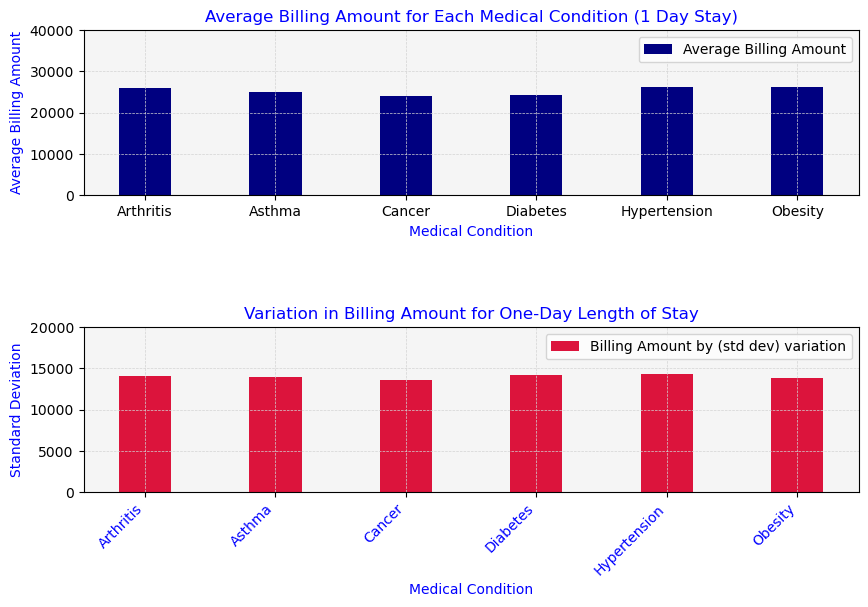

In [14]:
# Assuming 'avg_bill_amt_1d' and 'variations' are already calculated
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), gridspec_kw={'hspace': 0.8})  # Add spacing between subplots

# Bar chart for average billing amount with adjusted bar width
bar_width = 0.4
ax1.bar(avg_bill_amt_1d['Medical Condition'], avg_bill_amt_1d['Billing Amount'],\
        width=bar_width, color='navy', label='Average Billing Amount')
ax1.set_xlabel('Medical Condition', color='blue')
ax1.set_ylabel('Average Billing Amount', color='blue')
ax1.set_title('Average Billing Amount for Each Medical Condition (1 Day Stay)', color='blue')
ax1.set_xticks(ax1.get_xticks())
# Adjust x-tick spacing
plt.xticks(range(len(avg_bill_amt_1d['Medical Condition'])), avg_bill_amt_1d['Medical Condition'], rotation=45, ha='right', color='blue')
ax1.set_ylim(0, 40000)
ax1.grid(True, linestyle='--', linewidth=0.5, color='lightgrey')
ax1.set_facecolor('whitesmoke')
ax1.legend()


# Bar chart for standard deviation of billing amount with adjusted bar width
ax2.bar(variations_std['Medical Condition'], variations_std['Billing Amount'],\
        width=bar_width, color='crimson', label='Billing Amount by (std dev) variation')
ax2.set_xlabel('Medical Condition', color='blue')
ax2.set_ylabel('Standard Deviation', color='blue')
ax2.set_title('Variation in Billing Amount for One-Day Length of Stay', color='blue')
ax2.set_xticks(ax2.get_xticks())
# Adjust x-tick spacing
plt.xticks(range(len(avg_bill_amt_1d['Medical Condition'])), avg_bill_amt_1d['Medical Condition'],\
           rotation=45, ha='right', color='blue')
ax2.set_ylim(0, 20000)
ax2.grid(True, linestyle='--', linewidth=0.5, color='lightgrey')
ax2.set_facecolor('whitesmoke')
ax2.legend()
plt.show()

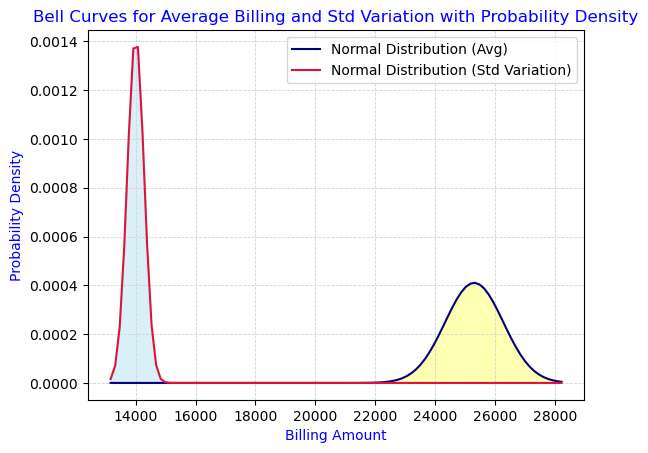

In [15]:
# Calculate mean and standard deviation of billing amounts
mean_billing = avg_bill_amt_1d['Billing Amount'].mean()
std_billing = avg_bill_amt_1d['Billing Amount'].std()

# Calculate mean and standard deviation for variations (ax2)
mean_variation = variations_std['Billing Amount'].mean()
std_variation = variations_std['Billing Amount'].std()

# Generate x-values for both bell curves (adjust range as needed)
x = np.linspace(min(mean_billing - 3*std_billing, mean_variation - 3*std_variation), 
                max(mean_billing + 3*std_billing, mean_variation + 3*std_variation), 100)

# Calculate y-values (PDF) for both bell curves
y_billing = norm.pdf(x, mean_billing, std_billing)
y_variation = norm.pdf(x, mean_variation, std_variation)

# Plot both bell curves on the same axes
plt.plot(x, y_billing, color='navy', label='Normal Distribution (Avg)')
plt.fill_between(x, y_billing, color='yellow', alpha=0.3)
plt.plot(x, y_variation, color='crimson', label='Normal Distribution (Std Variation)')
plt.fill_between(x, y_variation, color='skyblue', alpha=0.3)

plt.xlabel('Billing Amount', color='blue')
plt.ylabel('Probability Density', color='blue')
plt.title('Bell Curves for Average Billing and Std Variation with Probability Density', color='blue')
plt.grid(True, linestyle='--', linewidth=0.6, color='lightgrey') 
plt.legend()

In [16]:
# Display values of the most common medical condition for each gender:
gender_condition_counts = healthcare_df.groupby(['Gender', 'Medical Condition'])['Medical Condition'].count()
print(gender_condition_counts)

Gender  Medical Condition
Female  Arthritis            4686
        Asthma               4553
        Cancer               4602
        Diabetes             4651
        Hypertension         4612
        Obesity              4622
Male    Arthritis            4622
        Asthma               4632
        Cancer               4625
        Diabetes             4653
        Hypertension         4633
        Obesity              4609
Name: Medical Condition, dtype: int64


In [17]:
# Convert data into pandas DataFrame
data = {'Gender': ['Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male'],
        'Medical Condition': ['Arthritis', 'Asthma', 'Cancer', 'Diabetes', 'Hypertension', 'Obesity',
                             'Arthritis', 'Asthma', 'Cancer', 'Diabetes', 'Hypertension', 'Obesity',],
        'Count': [4686, 4553, 4602, 4651, 4612, 4622, 4622, 4632, 4625, 4653, 4633, 4609]}
df = pd.DataFrame(data)

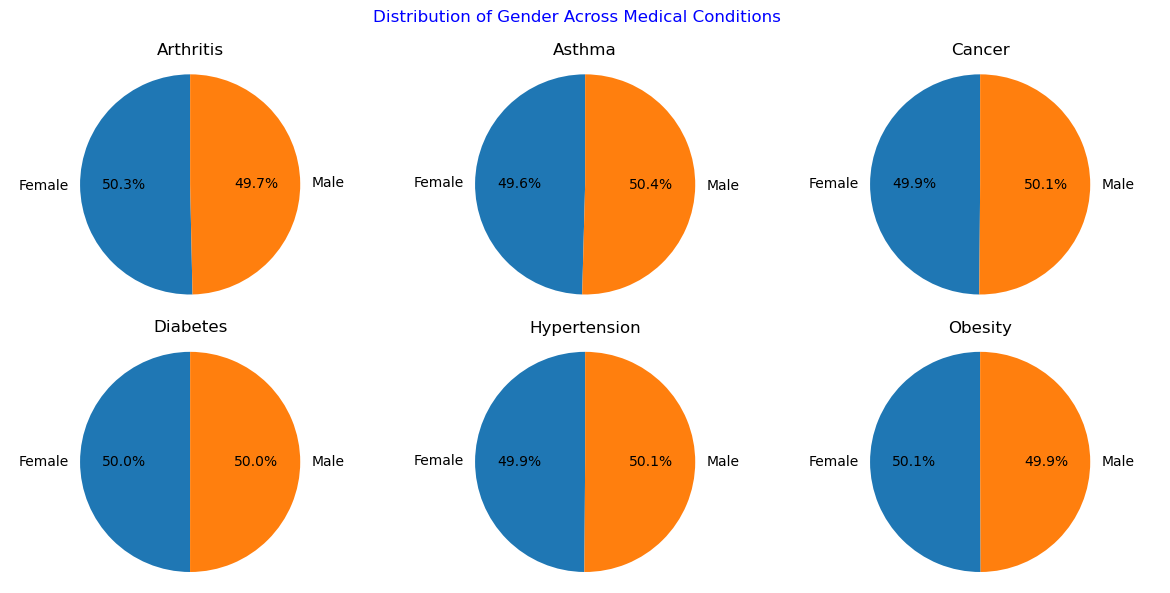

In [18]:
# Pivot the data to have Medical Condition as index, Gender as columns
condition_gender_counts = df.pivot(index='Medical Condition', columns='Gender', values='Count').fillna(0)

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 6))
axes = axes.flatten()

for i, condition in enumerate(condition_gender_counts.index):
    # Get counts for the current condition
    gender_counts = condition_gender_counts.loc[condition]

    # Plot pie chart
    axes[i].pie(gender_counts.values, 
                labels=gender_counts.index, 
                autopct='%1.1f%%', startangle=90)
    axes[i].set_title(condition)
    axes[i].axis('equal') 

plt.suptitle('Distribution of Gender Across Medical Conditions', color='blue')
plt.tight_layout()
plt.show()

I made 2 conclusions from the healthcare_dataset obtained from Kaggle, meant for educational purposes only, and does not extrapolate to the true population data.
In my analysis of one-day hospital stay for the 6 medical conditions and the billing amount: Hypertension indicated the highest billing cost for the management. In terms of variability in billing cost; the higher probability density peak and wider spread in the standard deviation plot suggest that there's a considerable amount of variability in individual billing amounts. In terms of potential outliers; the wider spread in the standard deviation plot might also indicate the presence of some outliers (unusually high or low billing amounts) that are contributing to the variability.
In my analysis of Medical Condition prevalence among the genders: Females were slightly more prone to arthritis(50.3% vs 49.7%), obesity(50.1% vs 49.9%). Males were more prone to Asthma (50.4% vs 49.6%), Cancer (50.1% vs 49.9%), & Hypertension (50.1% vs 49.9%) in this dataset. The distribution of diabetes was at 50% each, as visualized in the pie charts.
